# Qiskit implementation (solution): entanglement propagation in random quantum circuits

Assumption: you have a brief introduction on qiskit in Aachen. Our goal here is to implement a random quantum circuit and study the entanglement evolution in a many-body system.

In [1]:
pip install qiskit

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------  7.6/7.8 MB 41.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 38.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 33.9 MB/s  0:00:00

   -------- ------------------------------- 1/5 [stevedore]
   -------- ------------------------------- 1/5 [stevedore]
   -------- ------------------------------- 1/5 [stevedore]
   ---------------- ----------------------- 2/5 [rustworkx]
   ------------------------ --------------- 3/5 [dill]
   ------------------------ --------------- 3/5 [dill]
   ------------------------ --------------- 3/5 [dill]
   ------------------------ --------------- 3/5 [dill]
   ------------------------ --------------- 3/5 [dill]
   -------------------------------- ------- 4/5 [qiskit]
   -------------------------------- ------- 4/5 [qiskit]
   ----

In [1]:
%%capture
!python3 -m venv ./qi
!source ./qi/bin/activate
!pip install 'qiskit[visualization]'

In [2]:
import qiskit as qi
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import itertools as it

## **Task 1**

1. Create a circuit that generate a random state on $N$ qubits.
2. Write a function to compute the reduced purity given a state $|\Psi\rangle$ over the subsystem $A$. 
3. Write function that given a subsystem $A$ of size $N_A$, and total size $N$, and $\mathcal{N}$ disorder realization, returns a list, or numpy array of $\mathcal{N}$ realizations of the reduced purity. 
4. Verify that the average purity of the reduced density matrix verify the formula
$$

\mathbb{E}\left(\mathrm{tr}(\rho_A^2)\right) = \frac{d_A + d_B}{d_A d_B+1}

$$
with dimension $d_A = 2^{N_A}$ and $d_B = 2^{N-N_A}$. Focus on $N=8$, $N_A\le 4$ and $100\le \mathcal{N}\le 1000$. 


### **Hints:**
Use the `qi.quantum_info` library tools. Objects that can be useful are 
1. `qi.quantum_info.Statevector`, with the method `.from_label`
2. `qi.quantum_info.random_unitary` function returning a `qi.quantum_info.Operator`
3. `qi.quantum_info.partial_trace` function, returning a `qi.quantum_info.DensityMatrix`
4. `qi.quantum_info.DensityMatrix` has a method `.purity`.

In [3]:
qi.quantum_info.partial_trace?

Signature:
qi.quantum_info.partial_trace(
    state: 'Statevector | DensityMatrix',
    qargs: 'list',
) -> 'DensityMatrix'
Docstring:
Return reduced density matrix by tracing out part of quantum state.

If all subsystems are traced over this returns the
:meth:`~qiskit.quantum_info.DensityMatrix.trace` of the
input state.

Args:
    state (Statevector or DensityMatrix): the input state.
    qargs (list): The subsystems to trace over.

Returns:
    DensityMatrix: The reduced density matrix.

Raises:
    QiskitError: if input state is invalid.
File:      c:\users\uditv\appdata\local\programs\python\python313\lib\site-packages\qiskit\quantum_info\states\utils.py
Type:      function

In [4]:
# 1. 
def generate_random_state(N : int) -> qi.quantum_info.Statevector :
  psi = qi.quantum_info.Statevector.from_label('0'*N)
  u_rand = qi.quantum_info.random_unitary(2**N)
  qr = qi.QuantumRegister(N,'data')
  qc = qi.QuantumCircuit(qr)
  
  qc.append(u_rand,qr)

  return psi.evolve(qc)

# 2. 
def reduced_density_matrix_purity(Psi: qi.quantum_info.Statevector,
                          subsystem: list[int]) -> float:
  rho = qi.quantum_info.partial_trace(Psi,subsystem)
  return rho.purity()

# 3.
def random_reduced_purity(subsystem: list[int], 
                          N: int, Nshots: int) -> list[float]:
  res = [] 
  for _ in range(Nshots):
    psi = generate_random_state(N)
    pur = reduced_density_matrix_purity(psi,subsystem=subsystem)
    res.append(pur.real)
  ## TODO: Initialize result list.
  ## TODO: Loop over the disorder realizations.
  ## TODO: For each realization, initialize a random state, compute purity and append to the results.
  return res 

In [5]:
psitest = generate_random_state(4)
N = 8 
NA = N//2
exact_result = lambda NA, N: (2**NA + 2**(N-NA))/(2**N+1)
list_res = random_reduced_purity(list(range(NA)),N,1000)
print(np.mean(list_res),exact_result(NA,N))

0.12463566247925344 0.1245136186770428


## **Task 1+**
What happens for $\mathbb{E}\left(\mathrm{tr}(\rho_A^q)\right)$, with generic $q$? 
1. Obtain, using the replica method discussed, the leading order when $1\ll d_A\ll d$ and $1\ll d_A \sim \mathcal{O(d)}$, e.g., $d_A = d/2$. 
2. Compute the annealed average Renyi entropy
$$ 
S_n = \frac{1}{1-n}\log_2\left[\mathbb{E}\left(\mathrm{tr}(\rho_A^q)\right)\right]. 
$$
3. What happens when $q\to 1$? 

## **Task 1++**
Realistically, if you do many-body dynamics, you should write your own code. In that case, a good exercise is:
1. Initialize a quantum state as a `numpy.array`. 
2. Generate a random unitary acting on the full state. Hint: use `scipy.stats.unitary_group` at present, otherwise implement by hand what is in [this paper](https://arxiv.org/abs/math-ph/0609050v2). 
3. Reshape the state vector, for a contiguous interval $A$, to construct $R(|\Psi\rangle) = X$. From this compute the reduced density matrix $\rho_A = X X^\dagger$. 
4. Compute the purity. Compare the results with `qiskit` to know your implementation is good (testing).

## **Task 2**
Create a brickwall quantum circuit  (Fig. from [Brian Skinner's lecture notes](https://arxiv.org/pdf/2307.02986.pdf)). 

<img src=circuit.png alt = "" width=40% height=20%>

Each gate in the figure is a random unitary acting on two qubits. You should apply the gate to two (nearest-neighbors) target circuits. For simplicity, assume open boundary conditions. 
1. First, create a layer of two body nearest neighboring random gates. Each layer is composed of a gates acting on even bonds ($2i,2i+1$) or odd bonds ($2i+1,2i+2$), depending on the depth $0 \tau\le t$
2. Compute the reduced purity after one layer of the circuit. What is the average of this operation over many results? What did you expect?
3. Compute the reduced purity after each layers, after $t$ layers. For each circuit realization, this should result in a time-series. 
4. Define a function, that given $N$, $N_A$, $\mathcal{N}$ (as in Task 1) and $t$ the total depth, gives a matrix $\mathcal{N}\times (t+1)$ where each row is a realization of the circuit. (The $+1$ comes because we save also the value at $t=0$).
5. Compute the average over the rows, resulting in the average evolution $1\times t$. From this, compute the Renyi 2 entropy. How is the entanglement growing? Do the computation for $N\le 12$ and $N_A=N/2$. 
6. Compare with the prediction $S_2 \simeq v t$ with $v=-2\log_2(4/5)$. How good is this? When does it break down?

In [6]:
# 1. 
def generate_brickwall_layer(N : int, t: int) -> qi.QuantumCircuit :
  # u_rand = qi.quantum_info.random_unitary(2**N)
  qr = qi.QuantumRegister(N,'data')
  qc = qi.QuantumCircuit(qr)
  if (t%2==0):
    for i in range(0,N,2):
      u = qi.quantum_info.random_unitary(2**2)
      qc.append(u,[i,i+1])
  else: 
    for i in range(1,N-1,2):
      u = qi.quantum_info.random_unitary(2**2)
      qc.append(u,[i,i+1])
  #
    # for i in range(t%2,N-(t%2),2):
    #   u = qi.quantum_info.random_unitary(2**2)
    #   qc.append(u,[i,i+1])

  return qc 

# 2. 
def purity_evolution_realization(subsystem: list[int], 
                                 N: int, t_total: int) -> list[float]:
  psi = qi.quantum_info.Statevector.from_label('0'*N)
  res = [1]
  for t in range(t_total):
    qc = generate_brickwall_layer(N,t)
    psi = psi.evolve(qc)
    pur = reduced_density_matrix_purity(psi,subsystem=subsystem)
    res.append(pur.real)
    
  return res 

# 3.
def purity_evolution_average(subsystem: list[int], 
                        N: int, t_total: int, Nshots: int) -> np.array:
  tot_reals = []
  for _ in range(Nshots):
    tot_reals.append(purity_evolution_realization(subsystem,N,t_total))
  tot_reals = np.array(tot_reals)
  return np.mean(tot_reals,axis=0)

exact_s_2 = lambda t : np.log(5/4)*t 

Text(0, 0.5, '$S_2$')

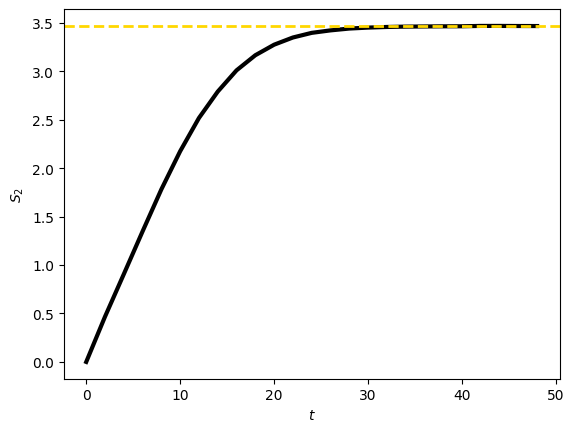

In [8]:
N = 12
NA = N//2
subsysA = list(range(NA))
# for _ in range(4):
#   purity = purity_evolution_realization(subsysA,N,4*N)
#   plt.plot(-np.log(purity))
tmax = 4*N
trange= np.arange(tmax+1)
average_purity = purity_evolution_average(subsysA,N,tmax,100)
plt.plot(trange[::2],-np.log(average_purity)[::2],c='black',lw=3)
plt.axhline(np.log(2)*(NA-1),c='gold',ls='--',lw=2)
plt.xlabel(r'$t$')
plt.ylabel(r'$S_2$')
#plt.plot(trange[:10],exact_s_2(trange)[:10],c='C1',lw=3)

## **Task 3 (probably homework)**
What happens if now we add measurements? Let us implement measurement circuits.
1. Check for a 2-qubit random gate, what happens when I measure one of the qubit to the subsystem purity? What does this means for entanglement?
2. Write a circuit where after each unitary layer, a layer of random on-site measurements (of $Z_i$) is applied. Each site is measured with a probability $p$. 
3. Repeat the realization analysis for $N=8,12$ and $\mathcal{N}=100$, varying $p$ from $0$ to $1$. The case $p=0$ should reproduce the previous results (no measurements happen). At $p=1$ what is the final state? Is it entangled? What happens in between?

Running simulation for p = 0.00 ...
Running simulation for p = 0.05 ...
Running simulation for p = 0.10 ...
Running simulation for p = 0.20 ...
Running simulation for p = 0.50 ...


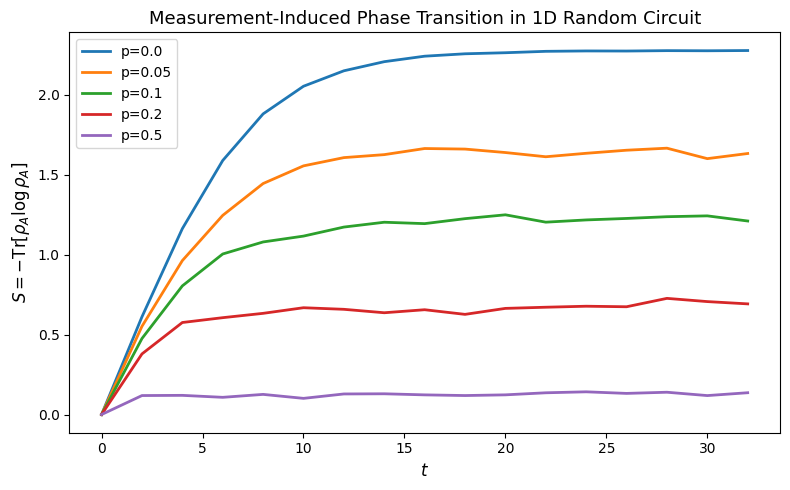

In [ ]:
import numpy as np
import qiskit as qi
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary, Statevector, partial_trace

# ---------------------------------------------------------------------
# Projective Z measurement with probability p
# ---------------------------------------------------------------------
def measure_z_with_prob(psi: Statevector, N: int, p: float) -> Statevector:
    """Perform projective Z measurements on each qubit with probability p."""
    for i in range(N):
        if np.random.rand() < p:
            # Compute marginal probabilities for qubit i
            probs = psi.probabilities([i])
            outcome = np.random.choice([0, 1], p=probs)

            # Projector for |0> or |1> on qubit i
            projector = np.array([[1, 0], [0, 0]]) if outcome == 0 else np.array([[0, 0], [0, 1]])

            # Expand projector to full Hilbert space
            proj_ops = [np.eye(2) for _ in range(N)]
            proj_ops[i] = projector
            P = proj_ops[0]
            for j in range(1, N):
                P = np.kron(P, proj_ops[j])

            # Collapse and renormalize
            new_state = P @ psi.data
            norm = np.linalg.norm(new_state)
            if norm < 1e-12:
                continue
            new_state /= norm
            psi = Statevector(new_state)
    return psi

# ---------------------------------------------------------------------
# Random 2-qubit brick-wall unitaries
# ---------------------------------------------------------------------
def generate_brickwall_layer(N: int, t: int) -> qi.QuantumCircuit:
    qr = qi.QuantumRegister(N, 'data')
    qc = qi.QuantumCircuit(qr)
    if t % 2 == 0:
        for i in range(0, N - 1, 2):
            qc.append(random_unitary(4), [i, i + 1])
    else:
        for i in range(1, N - 1, 2):
            qc.append(random_unitary(4), [i, i + 1])
    return qc

# ---------------------------------------------------------------------
# Numerically safe von Neumann entropy
# ---------------------------------------------------------------------
def von_neumann_entropy(psi: Statevector, subsystem: list[int]) -> float:
    """Compute S = -Tr(ρ_A log ρ_A) for subsystem A (numerically stable)."""
    traced_systems = [i for i in range(psi.num_qubits) if i not in subsystem]
    rho_A = partial_trace(psi, traced_systems)
    rho = rho_A.data

    # Force Hermiticity to avoid small rounding noise
    rho = 0.5 * (rho + rho.conj().T)

    # Eigen-decomposition (stable)
    eigvals = np.real(np.linalg.eigvalsh(rho))
    eigvals = np.clip(eigvals, 1e-15, 1.0)
    return -np.sum(eigvals * np.log(eigvals))

# ---------------------------------------------------------------------
# Single-realization entropy evolution
# ---------------------------------------------------------------------
def entropy_evolution_realization(subsystem: list[int],
                                  N: int,
                                  t_total: int,
                                  p: float) -> list[float]:
    psi = Statevector.from_label('0' * N)
    res = [0.0]
    for t in range(t_total):
        qc = generate_brickwall_layer(N, t)
        psi = psi.evolve(qc)
        psi = measure_z_with_prob(psi, N, p)
        S = von_neumann_entropy(psi, subsystem=subsystem)
        res.append(S)
    return res

# ---------------------------------------------------------------------
# Average over multiple realizations
# ---------------------------------------------------------------------
def entropy_evolution_average(subsystem: list[int],
                              N: int,
                              t_total: int,
                              Nshots: int,
                              p: float) -> np.ndarray:
    all_runs = [entropy_evolution_realization(subsystem, N, t_total, p)
                for _ in range(Nshots)]
    return np.mean(np.array(all_runs), axis=0)

# ---------------------------------------------------------------------
# Simulation parameters
# ---------------------------------------------------------------------
N = 8                 # number of qubits (try 8–12)
NA = N // 2
subsysA = list(range(NA))
tmax = 4 * N
trange = np.arange(tmax + 1)
p_values = [0.0, 0.05, 0.1, 0.2, 0.5, 0.6]   # measurement probabilities
Nshots = 200                              # number of random circuit realizations

# ---------------------------------------------------------------------
# Run simulation and plot results
# ---------------------------------------------------------------------
plt.figure(figsize=(8, 5))

for p in p_values:
    print(f"Running simulation for p = {p:.2f} ...")
    avg_S = entropy_evolution_average(subsysA, N, tmax, Nshots, p)
    plt.plot(trange[::2], avg_S[::2], lw=2, label=f"p={p}")

# Volume-law saturation line

plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$S = -\mathrm{Tr}[\rho_A \log \rho_A]$', fontsize=12)
plt.title('Measurement-Induced Phase Transition in 1D Random Circuit', fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

Running simulation for p = 0.00 ...
Running simulation for p = 0.05 ...
Running simulation for p = 0.10 ...
Running simulation for p = 0.20 ...
Running simulation for p = 0.50 ...
Running simulation for p = 0.60 ...


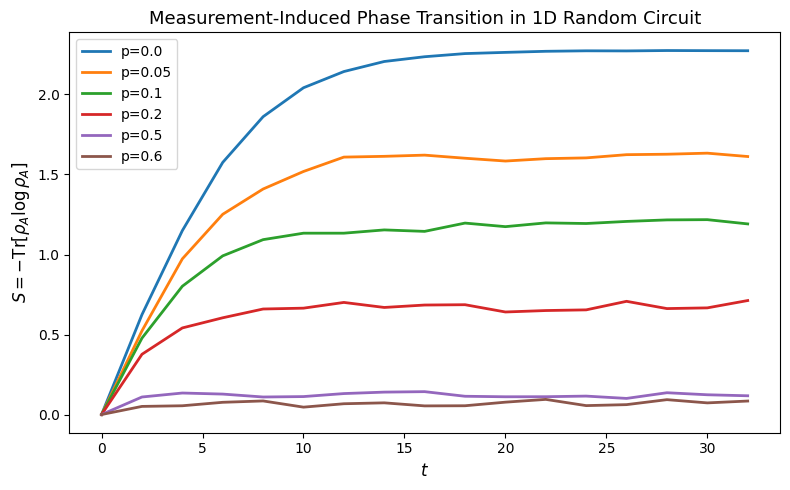

In [14]:
import numpy as np
import qiskit as qi
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary, Statevector, partial_trace

# ---------------------------------------------------------------------
# Projective Z measurement with probability p
# ---------------------------------------------------------------------
def measure_z_with_prob(psi: Statevector, N: int, p: float) -> Statevector:
    """Perform projective Z measurements on each qubit with probability p."""
    for i in range(N):
        if np.random.rand() < p:
            # Compute marginal probabilities for qubit i
            probs = psi.probabilities([i])
            outcome = np.random.choice([0, 1], p=probs)

            # Projector for |0> or |1> on qubit i
            projector = np.array([[1, 0], [0, 0]]) if outcome == 0 else np.array([[0, 0], [0, 1]])

            # Expand projector to full Hilbert space
            proj_ops = [np.eye(2) for _ in range(N)]
            proj_ops[i] = projector
            P = proj_ops[0]
            for j in range(1, N):
                P = np.kron(P, proj_ops[j])

            # Collapse and renormalize
            new_state = P @ psi.data
            norm = np.linalg.norm(new_state)
            if norm < 1e-12:
                continue
            new_state /= norm
            psi = Statevector(new_state)
    return psi

# ---------------------------------------------------------------------
# Random 2-qubit brick-wall unitaries
# ---------------------------------------------------------------------
def generate_brickwall_layer(N: int, t: int) -> qi.QuantumCircuit:
    qr = qi.QuantumRegister(N, 'data')
    qc = qi.QuantumCircuit(qr)
    if t % 2 == 0:
        for i in range(0, N - 1, 2):
            qc.append(random_unitary(4), [i, i + 1])
    else:
        for i in range(1, N - 1, 2):
            qc.append(random_unitary(4), [i, i + 1])
    return qc

# ---------------------------------------------------------------------
# Numerically safe von Neumann entropy
# ---------------------------------------------------------------------
def von_neumann_entropy(psi: Statevector, subsystem: list[int]) -> float:
    """Compute S = -Tr(ρ_A log ρ_A) for subsystem A (numerically stable)."""
    traced_systems = [i for i in range(psi.num_qubits) if i not in subsystem]
    rho_A = partial_trace(psi, traced_systems)
    rho = rho_A.data

    # Force Hermiticity to avoid small rounding noise
    rho = 0.5 * (rho + rho.conj().T)

    # Eigen-decomposition (stable)
    eigvals = np.real(np.linalg.eigvalsh(rho))
    eigvals = np.clip(eigvals, 1e-15, 1.0)
    return -np.sum(eigvals * np.log(eigvals))

# ---------------------------------------------------------------------
# Single-realization entropy evolution
# ---------------------------------------------------------------------
def entropy_evolution_realization(subsystem: list[int],
                                  N: int,
                                  t_total: int,
                                  p: float) -> list[float]:
    psi = Statevector.from_label('0' * N)
    res = [0.0]
    for t in range(t_total):
        qc = generate_brickwall_layer(N, t)
        psi = psi.evolve(qc)
        psi = measure_z_with_prob(psi, N, p)
        S = von_neumann_entropy(psi, subsystem=subsystem)
        res.append(S)
    return res

# ---------------------------------------------------------------------
# Average over multiple realizations
# ---------------------------------------------------------------------
def entropy_evolution_average(subsystem: list[int],
                              N: int,
                              t_total: int,
                              Nshots: int,
                              p: float) -> np.ndarray:
    all_runs = [entropy_evolution_realization(subsystem, N, t_total, p)
                for _ in range(Nshots)]
    return np.mean(np.array(all_runs), axis=0)

# ---------------------------------------------------------------------
# Simulation parameters
# ---------------------------------------------------------------------
N = 8                 # number of qubits (try 8–12)
NA = N // 2
subsysA = list(range(NA))
tmax = 4 * N
trange = np.arange(tmax + 1)
p_values = [0.0, 0.05, 0.1, 0.2, 0.5, 0.6]   # measurement probabilities
Nshots = 200                              # number of random circuit realizations

# ---------------------------------------------------------------------
# Run simulation and plot results
# ---------------------------------------------------------------------
plt.figure(figsize=(8, 5))

for p in p_values:
    print(f"Running simulation for p = {p:.2f} ...")
    avg_S = entropy_evolution_average(subsysA, N, tmax, Nshots, p)
    plt.plot(trange[::2], avg_S[::2], lw=2, label=f"p={p}")

# Volume-law saturation line

plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$S = -\mathrm{Tr}[\rho_A \log \rho_A]$', fontsize=12)
plt.title('Measurement-Induced Phase Transition in 1D Random Circuit', fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
import numpy as np
import qiskit as qi
import matplotlib.pyplot as plt
import os
from qiskit.quantum_info import random_unitary, Statevector, partial_trace

# ---------------------------------------------------------------------
# Projective Z measurement with probability p
# ---------------------------------------------------------------------
def measure_z_with_prob(psi: Statevector, N: int, p: float) -> Statevector:
    """Perform projective Z measurements on each qubit with probability p."""
    for i in range(N):
        if np.random.rand() < p:
            probs = psi.probabilities([i])
            outcome = np.random.choice([0, 1], p=probs)

            # Projector for |0> or |1> on qubit i
            projector = np.array([[1, 0], [0, 0]]) if outcome == 0 else np.array([[0, 0], [0, 1]])
            proj_ops = [np.eye(2) for _ in range(N)]
            proj_ops[i] = projector
            P = proj_ops[0]
            for j in range(1, N):
                P = np.kron(P, proj_ops[j])

            # Collapse and renormalize
            new_state = P @ psi.data
            norm = np.linalg.norm(new_state)
            if norm < 1e-12:
                continue
            new_state /= norm
            psi = Statevector(new_state)
    return psi

# ---------------------------------------------------------------------
# Random 2-qubit brick-wall unitaries
# ---------------------------------------------------------------------
def generate_brickwall_layer(N: int, t: int) -> qi.QuantumCircuit:
    qr = qi.QuantumRegister(N, 'data')
    qc = qi.QuantumCircuit(qr)
    if t % 2 == 0:
        for i in range(0, N - 1, 2):
            qc.append(random_unitary(4), [i, i + 1])
    else:
        for i in range(1, N - 1, 2):
            qc.append(random_unitary(4), [i, i + 1])
    return qc

# ---------------------------------------------------------------------
# Numerically stable von Neumann entropy
# ---------------------------------------------------------------------
def von_neumann_entropy(psi: Statevector, subsystem: list[int]) -> float:
    """Compute S = -Tr(ρ_A log ρ_A) for subsystem A (numerically stable)."""
    traced_systems = [i for i in range(psi.num_qubits) if i not in subsystem]
    rho_A = partial_trace(psi, traced_systems)
    rho = rho_A.data
    rho = 0.5 * (rho + rho.conj().T)  # enforce Hermiticity
    eigvals = np.real(np.linalg.eigvalsh(rho))
    eigvals = np.clip(eigvals, 1e-15, 1.0)
    return -np.sum(eigvals * np.log(eigvals))

# ---------------------------------------------------------------------
# Single-realization entropy evolution
# ---------------------------------------------------------------------
def entropy_evolution_realization(subsystem: list[int],
                                  N: int,
                                  t_total: int,
                                  p: float) -> list[float]:
    psi = Statevector.from_label('0' * N)
    res = [0.0]
    for t in range(t_total):
        qc = generate_brickwall_layer(N, t)
        psi = psi.evolve(qc)
        psi = measure_z_with_prob(psi, N, p)
        S = von_neumann_entropy(psi, subsystem=subsystem)
        res.append(S)
    return res

# ---------------------------------------------------------------------
# Run multiple realizations and SAVE each shot
# ---------------------------------------------------------------------
def entropy_evolution_and_save(subsystem: list[int],
                               N: int,
                               t_total: int,
                               Nshots: int,
                               p: float,
                               dt: int = 1,
                               direction: str = "fwd",
                               save_dir: str = "data"):
    """Run Nshots simulations, save each shot’s entropy evolution as .npy"""
    os.makedirs(save_dir, exist_ok=True)
    all_runs = []
    for s in range(Nshots):
        print(f"Running shot {s+1}/{Nshots} for p={p:.3f}")
        S_t = entropy_evolution_realization(subsystem, N, t_total, p)
        all_runs.append(S_t)

        filename = f"L{N},T{t_total},dt{dt},p{p},dir{direction},s{s}.npy"
        np.save(os.path.join(save_dir, filename), np.array(S_t))

    return np.array(all_runs)

# ---------------------------------------------------------------------
# Simulation parameters
# ---------------------------------------------------------------------
N_list = [6, 7, 8, 9, 10]    # system sizes
p_values = [0. , 0.1, 0.16, 0.3, 0.7, 1. ]
Nshots = 100
save_dir = r"D:\Research\Jed\entanglement-dynamics\data_hc_haarl"  # save folder

# --- Plot setup ---
#plt.figure(figsize=(8, 5))

# --- Loop over system sizes and measurement probabilities ---
for N in N_list:
    NA = N // 2
    subsysA = list(range(NA))
    tmax = 4 * N
    trange = np.arange(tmax + 1)

    print(f"\n===== Running simulations for L = {N} =====")

    for p in p_values:
        all_S = entropy_evolution_and_save(
            subsysA,
            N,
            tmax,
            Nshots,
            p,
            dt=1,
            direction="Z",
            save_dir=save_dir
        )


===== Running simulations for L = 6 =====
Running shot 1/100 for p=0.000
Running shot 2/100 for p=0.000
Running shot 3/100 for p=0.000
Running shot 4/100 for p=0.000
Running shot 5/100 for p=0.000
Running shot 6/100 for p=0.000
Running shot 7/100 for p=0.000
Running shot 8/100 for p=0.000
Running shot 9/100 for p=0.000
Running shot 10/100 for p=0.000
Running shot 11/100 for p=0.000
Running shot 12/100 for p=0.000
Running shot 13/100 for p=0.000
Running shot 14/100 for p=0.000
Running shot 15/100 for p=0.000
Running shot 16/100 for p=0.000
Running shot 17/100 for p=0.000
Running shot 18/100 for p=0.000
Running shot 19/100 for p=0.000
Running shot 20/100 for p=0.000
Running shot 21/100 for p=0.000
Running shot 22/100 for p=0.000
Running shot 23/100 for p=0.000
Running shot 24/100 for p=0.000
Running shot 25/100 for p=0.000
Running shot 26/100 for p=0.000
Running shot 27/100 for p=0.000
Running shot 28/100 for p=0.000
Running shot 29/100 for p=0.000
Running shot 30/100 for p=0.000
Runnin


Plotting results for L = 8


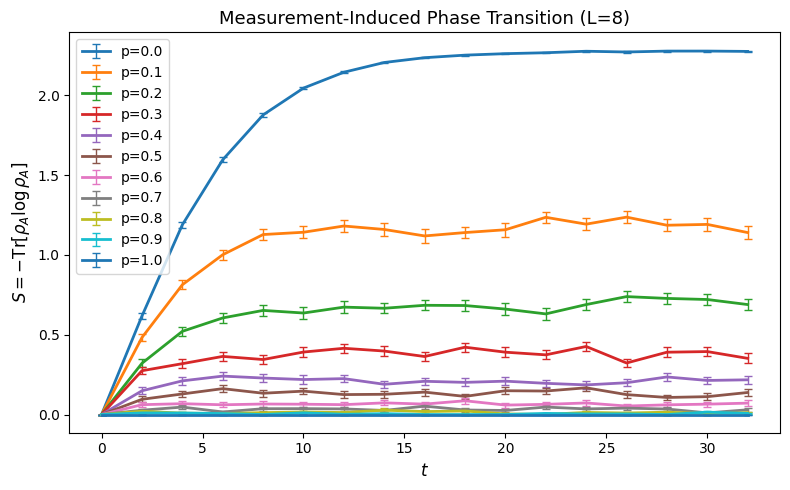


Plotting results for L = 10


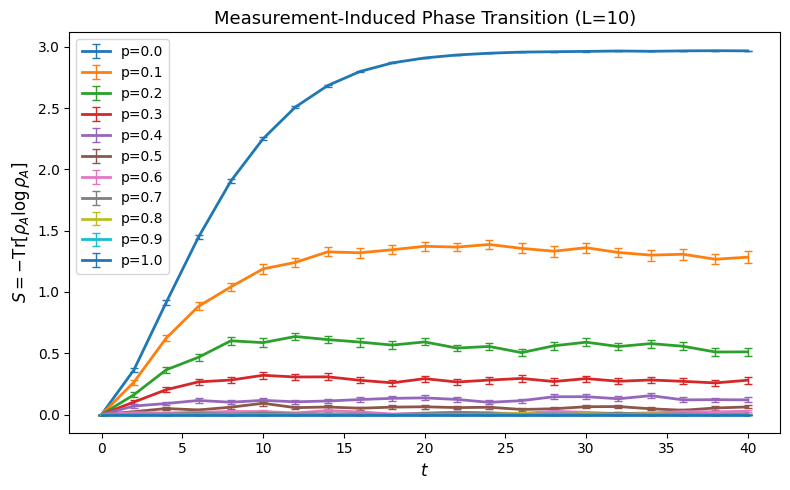

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# --- Parameters ---
data_dir = r"D:\Research\Jed\entanglement-dynamics\data_hc_haarl"
L_list = [8, 10]
p_values = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
Nshots = 200  # number of realizations used per (L, p)

# --- Plot for each system size separately ---
for L in L_list:
    plt.figure(figsize=(8, 5))
    print(f"\nPlotting results for L = {L}")

    for p in p_values:
        # Find all files for this L and p
        pattern = os.path.join(data_dir, f"L{L},T*,dt*,p{p},dirZ,s*.npy")
        files = sorted(glob.glob(pattern))

        if len(files) == 0:
            print(f"⚠️ No data found for L={L}, p={p}")
            continue

        # Load all shots
        shots = [np.load(f) for f in files]
        shots = np.array(shots)

        # Compute mean and standard error
        mean_S = np.mean(shots, axis=0)
        std_S = np.std(shots, axis=0, ddof=1)  # unbiased std
        sem_S = std_S / np.sqrt(len(shots))    # standard error

        # Time axis from data length
        tmax = len(mean_S) - 1
        trange = np.arange(tmax + 1)

        # Plot mean with error bars
        plt.errorbar(trange[::2], mean_S[::2], yerr=sem_S[::2],
                     lw=2, elinewidth=1, capsize=3, label=f"p={p}")

    plt.xlabel(r'$t$', fontsize=12)
    plt.ylabel(r'$S = -\mathrm{Tr}[\rho_A \log \rho_A]$', fontsize=12)
    plt.title(f'Measurement-Induced Phase Transition (L={L})', fontsize=13)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import glob
import os

# --- Parameters ---
data_dir = r"D:\Research\Jed\entanglement-dynamics\data_hc_haarl"
data1_dir = r"D:\Research\Jed\entanglement-dynamics"
L_list = [6,7,8,9,10]
p_values = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]

# --- Compute and store variances ---
for L in L_list:
    var_results = []

    for p in p_values:
        pattern = os.path.join(data_dir, f"L{L},T*,dt*,p{p},dirZ,s*.npy")
        files = sorted(glob.glob(pattern))

        if len(files) == 0:
            print(f"⚠️ No data found for L={L}, p={p}")
            var_results.append(np.nan)
            continue

        # Load all shot trajectories
        shots = [np.load(f) for f in files]
        shots = np.array(shots)

        # Variance as a function of time
        var_t = np.var(shots, axis=0, ddof=1)

        # Average variance across time (ignore t=0)
        var_mean = np.mean(var_t[1:])

        var_results.append(var_mean)

    var_results = np.array(var_results)

    # Save variance vs p for this system size
    save_path = os.path.join(data1_dir, f"variance_vs_p_L{L}.npy")
    np.save(save_path, var_results)
    print(f"✅ Saved {save_path}")


✅ Saved D:\Research\Jed\entanglement-dynamics\variance_vs_p_L8.npy
✅ Saved D:\Research\Jed\entanglement-dynamics\variance_vs_p_L10.npy


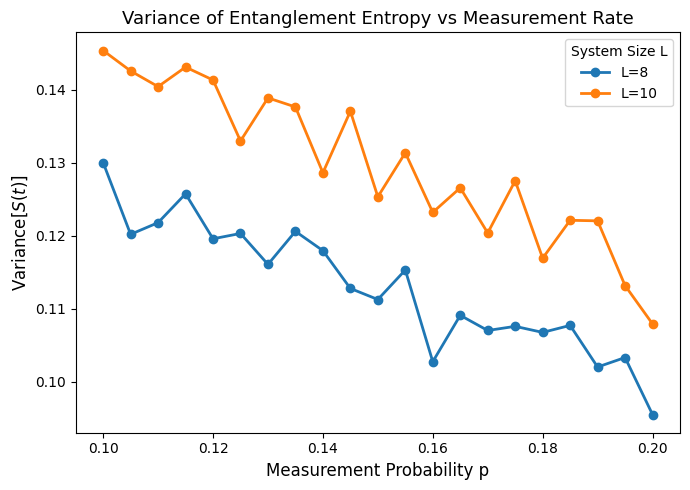

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Parameters ---
data_dir = r"D:\Research\Jed\entanglement-dynamics"
L_list = [8, 10]
p_values = [0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 ,
       0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185,
       0.19 , 0.195, 0.2  ]

plt.figure(figsize=(7, 5))

for L in L_list:
    file_path = os.path.join(data_dir, f"variance_vs_p_L{L}.npy")
    if not os.path.exists(file_path):
        print(f"⚠️ Missing variance file for L={L}")
        continue

    var_data = np.load(file_path)
    plt.plot(p_values, var_data, marker='o', lw=2, label=f"L={L}")

plt.xlabel("Measurement Probability p", fontsize=12)
plt.ylabel(r"Variance[$S(t)$]", fontsize=12)
plt.title("Variance of Entanglement Entropy vs Measurement Rate", fontsize=13)
plt.legend(title="System Size L")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import qiskit as qi
import matplotlib.pyplot as plt
import os
from qiskit.quantum_info import random_unitary, Statevector, partial_trace

# ---------------------------------------------------------------------
# Projective Z measurement with probability p (only on data qubits)
# ---------------------------------------------------------------------
def measure_z_with_prob(psi: Statevector, N_data: int, p: float) -> Statevector:
    total_q = psi.num_qubits
    for i in range(N_data):
        if np.random.rand() < p:
            probs = psi.probabilities([i])
            outcome = np.random.choice([0, 1], p=probs)
            projector = np.array([[1, 0], [0, 0]]) if outcome == 0 else np.array([[0, 0], [0, 1]])
            proj_ops = [np.eye(2) for _ in range(total_q)]
            proj_ops[i] = projector
            P = proj_ops[0]
            for j in range(1, total_q):
                P = np.kron(P, proj_ops[j])
            new_state = P @ psi.data
            norm = np.linalg.norm(new_state)
            if norm < 1e-12:
                continue
            new_state /= norm
            psi = Statevector(new_state)
    return psi

# ---------------------------------------------------------------------
# Random 2-qubit brick-wall unitaries on data qubits
# ---------------------------------------------------------------------
def generate_brickwall_layer(N_data: int, t: int, total_qubits: int, ancilla_idx: int) -> qi.QuantumCircuit:
    qr = qi.QuantumRegister(total_qubits, 'q')
    qc = qi.QuantumCircuit(qr)
    start = 0 if t % 2 == 0 else 1
    for i in range(start, N_data - 1, 2):
        U = random_unitary(4)
        qc.append(U, [qr[i], qr[i + 1]])
    return qc

# ---------------------------------------------------------------------
# Von Neumann entropy
# ---------------------------------------------------------------------
def von_neumann_entropy(psi: Statevector, subsystem: list[int]) -> float:
    traced_systems = [i for i in range(psi.num_qubits) if i not in subsystem]
    rho_A = partial_trace(psi, traced_systems)
    rho = 0.5 * (rho_A.data + rho_A.data.conj().T)
    eigvals = np.real(np.linalg.eigvalsh(rho))
    eigvals = np.clip(eigvals, 1e-15, 1.0)
    return -np.sum(eigvals * np.log(eigvals))

# ---------------------------------------------------------------------
# Single realization for ancilla entropy
# ---------------------------------------------------------------------
def entropy_evolution_with_ancilla(N_data: int, t_total: int, p: float, seed: int | None = None) -> list[float]:
    if seed is not None:
        np.random.seed(seed)

    total_qubits = N_data + 1
    ancilla_idx = N_data
    psi = Statevector.from_label('0' * total_qubits)

    # Prepare Bell pair between last data qubit and ancilla
    prep = qi.QuantumCircuit(qi.QuantumRegister(total_qubits))
    last_data = N_data - 1
    prep.h(last_data)
    prep.cx(last_data, ancilla_idx)
    psi = psi.evolve(prep)

    S_list = [von_neumann_entropy(psi, [ancilla_idx])]

    for t in range(1, t_total + 1):
        layer = generate_brickwall_layer(N_data, t - 1, total_qubits, ancilla_idx)
        psi = psi.evolve(layer)
        p_eff = 0.0 if t <= t_total/2 else p
        if p_eff > 0:
            psi = measure_z_with_prob(psi, N_data, p_eff)
        S_list.append(von_neumann_entropy(psi, [ancilla_idx]))

    return S_list

# ---------------------------------------------------------------------
# Multiple realizations and save
# ---------------------------------------------------------------------
def entropy_evolution_and_save(N_data: int, t_total: int, Nshots: int, p: float,
                               dt: int = 1, direction: str = "fwd", save_dir: str = "data"):
    os.makedirs(save_dir, exist_ok=True)
    all_runs = []
    for s in range(Nshots):
        print(f"Running shot {s+1}/{Nshots} for p={p:.3f}")
        S_t = entropy_evolution_with_ancilla(N_data, t_total, p, seed=None)
        all_runs.append(S_t)
        filename = f"L{N_data},T{t_total},dt{dt},p{p:.3f},dir{direction},s{s}.npy"
        np.save(os.path.join(save_dir, filename), np.array(S_t))
    return np.array(all_runs)

# ---------------------------------------------------------------------
# Simulation parameters
# ---------------------------------------------------------------------
N_list = [8]  # system sizes
p_values = [0.0, 0.05, 0.1, 0.2]
Nshots = 200
save_dir = r"D:\Research\Jed\entanglement-dynamics\data_hc_haar_ancilla"

# ---------------------------------------------------------------------
# Run simulations
# ---------------------------------------------------------------------
plt.figure(figsize=(8, 5))

for N in N_list:
    tmax = 4 * N
    for p in p_values:
        all_S = entropy_evolution_and_save(
            N_data=N,
            t_total=tmax,
            Nshots=Nshots,
            p=p,
            dt=1,
            direction="Z",
            save_dir=save_dir
        )


===== Running simulations for L = 8 =====
Running shot 1/200 for p=0.000
Running shot 2/200 for p=0.000
Running shot 3/200 for p=0.000
Running shot 4/200 for p=0.000
Running shot 5/200 for p=0.000
Running shot 6/200 for p=0.000
Running shot 7/200 for p=0.000
Running shot 8/200 for p=0.000
Running shot 9/200 for p=0.000
Running shot 10/200 for p=0.000
Running shot 11/200 for p=0.000
Running shot 12/200 for p=0.000
Running shot 13/200 for p=0.000
Running shot 14/200 for p=0.000
Running shot 15/200 for p=0.000
Running shot 16/200 for p=0.000
Running shot 17/200 for p=0.000
Running shot 18/200 for p=0.000
Running shot 19/200 for p=0.000
Running shot 20/200 for p=0.000
Running shot 21/200 for p=0.000
Running shot 22/200 for p=0.000
Running shot 23/200 for p=0.000
Running shot 24/200 for p=0.000
Running shot 25/200 for p=0.000
Running shot 26/200 for p=0.000
Running shot 27/200 for p=0.000
Running shot 28/200 for p=0.000
Running shot 29/200 for p=0.000
Running shot 30/200 for p=0.000
Runnin

<Figure size 800x500 with 0 Axes>

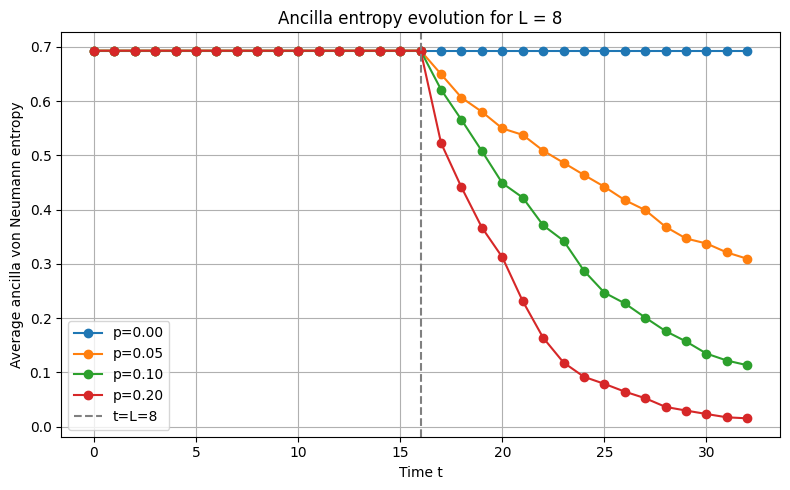

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------------------------------------------------------------------
# Load all saved shots for a given L and p
# ---------------------------------------------------------------------
def load_entropy_data(L: int, p: float, save_dir: str) -> np.ndarray:
    files = [f for f in os.listdir(save_dir) if f"L{L}" in f and f"p{p:.3f}" in f]
    all_S = []
    for f in files:
        data = np.load(os.path.join(save_dir, f))
        all_S.append(data)
    return np.array(all_S)  # shape: (Nshots, tmax+1)

# ---------------------------------------------------------------------
# Parameters
# ---------------------------------------------------------------------
N_list = [8]  # system sizes
p_values = [0.0, 0.05, 0.1, 0.2]
save_dir = r"D:\Research\Jed\entanglement-dynamics\data_hc_haar_ancilla"

# ---------------------------------------------------------------------
# Plot average ancilla entropy
# ---------------------------------------------------------------------
for N in N_list:
    plt.figure(figsize=(8, 5))
    tmax = 4 * N
    times = np.arange(tmax + 1)

    for p in p_values:
        all_S = load_entropy_data(N, p, save_dir)
        if all_S.size == 0:
            print(f"No data found for L={N}, p={p}")
            continue
        S_avg = np.mean(all_S, axis=0)
        plt.plot(times, S_avg, marker='o', label=f"p={p:.2f}")

    plt.axvline(tmax/2, color='gray', linestyle='--', label=f"t=L={N}")
    plt.xlabel("Time t")
    plt.ylabel("Average ancilla von Neumann entropy")
    plt.title(f"Ancilla entropy evolution for L = {N}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [38]:
import numpy as np
import qiskit as qi
import matplotlib.pyplot as plt
import os
from qiskit.quantum_info import random_unitary, Statevector, partial_trace

# ---------------------------------------------------------------------
# Projective Z measurement with probability p (only on data qubits)
# ---------------------------------------------------------------------
def measure_z_with_prob(psi: Statevector, N_data: int, p: float) -> Statevector:
    total_q = psi.num_qubits
    for i in range(N_data):
        if np.random.rand() < p:
            probs = psi.probabilities([i])
            outcome = np.random.choice([0, 1], p=probs)
            projector = np.array([[1, 0], [0, 0]]) if outcome == 0 else np.array([[0, 0], [0, 1]])
            proj_ops = [np.eye(2) for _ in range(total_q)]
            proj_ops[i] = projector
            P = proj_ops[0]
            for j in range(1, total_q):
                P = np.kron(P, proj_ops[j])
            new_state = P @ psi.data
            norm = np.linalg.norm(new_state)
            if norm < 1e-12:
                continue
            new_state /= norm
            psi = Statevector(new_state)
    return psi

# ---------------------------------------------------------------------
# Random 2-qubit brick-wall unitaries on data qubits
# ---------------------------------------------------------------------
def generate_brickwall_layer(N_data: int, t: int, total_qubits: int, ancilla_idx: int) -> qi.QuantumCircuit:
    qr = qi.QuantumRegister(total_qubits, 'q')
    qc = qi.QuantumCircuit(qr)
    start = 0 if t % 2 == 0 else 1
    for i in range(start, N_data - 1, 2):
        U = random_unitary(4)
        qc.append(U, [qr[i], qr[i + 1]])
    return qc

# ---------------------------------------------------------------------
# Von Neumann entropy
# ---------------------------------------------------------------------
def von_neumann_entropy(psi: Statevector, subsystem: list[int]) -> float:
    traced_systems = [i for i in range(psi.num_qubits) if i not in subsystem]
    rho_A = partial_trace(psi, traced_systems)
    rho = 0.5 * (rho_A.data + rho_A.data.conj().T)
    eigvals = np.real(np.linalg.eigvalsh(rho))
    eigvals = np.clip(eigvals, 1e-15, 1.0)
    return -np.sum(eigvals * np.log(eigvals))

# ---------------------------------------------------------------------
# Single realization for ancilla entropy
# ---------------------------------------------------------------------
def entropy_evolution_with_ancilla(N_data: int, t_total: int, p: float, seed: int | None = None) -> list[float]:
    if seed is not None:
        np.random.seed(seed)

    total_qubits = N_data + 1
    ancilla_idx = N_data
    psi = Statevector.from_label('0' * total_qubits)

    # Prepare Bell pair between last data qubit and ancilla
    prep = qi.QuantumCircuit(qi.QuantumRegister(total_qubits))
    last_data = N_data - 1
    prep.h(last_data)
    prep.cx(last_data, ancilla_idx)
    psi = psi.evolve(prep)

    S_list = [von_neumann_entropy(psi, [ancilla_idx])]

    for t in range(1, t_total + 1):
        layer = generate_brickwall_layer(N_data, t - 1, total_qubits, ancilla_idx)
        psi = psi.evolve(layer)
        p_eff = 0.0 if t <= t_total/2 else p
        if p_eff > 0:
            psi = measure_z_with_prob(psi, N_data, p_eff)
        S_list.append(von_neumann_entropy(psi, [ancilla_idx]))

    return S_list

# ---------------------------------------------------------------------
# Multiple realizations and save
# ---------------------------------------------------------------------
def entropy_evolution_and_save(N_data: int, t_total: int, Nshots: int, p: float,
                               dt: int = 1, direction: str = "fwd", save_dir: str = "data"):
    os.makedirs(save_dir, exist_ok=True)
    all_runs = []
    for s in range(Nshots):
        S_t = entropy_evolution_with_ancilla(N_data, t_total, p, seed=None)
        all_runs.append(S_t)
        filename = f"L{N_data},T{t_total},dt{dt},p{p:.3f},dir{direction},s{s}.npy"
        np.save(filename, np.array(S_t))
    return np.array(all_runs)

# ---------------------------------------------------------------------
# Simulation parameters
# ---------------------------------------------------------------------
N_list = [8]  # system sizes
p_values = [0.0, 0.05, 0.1, 0.2]
Nshots = 2
#save_dir = r"D:\Research\Jed\entanglement-dynamics\data_hc_haar_ancilla"

# ---------------------------------------------------------------------
# Run simulations
# --------------------------------------------------------------------

for N in N_list:
    tmax = 4 * N
    for p in p_values:
        all_S = entropy_evolution_and_save(
            N_data=N,
            t_total=tmax,
            Nshots=Nshots,
            p=p,
            dt=1,
            direction="Z",
            save_dir=save_dir
        )

In [1]:
import numpy as np

In [8]:
np.linspace(0.0,1.0,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])


Plotting results for L = 6


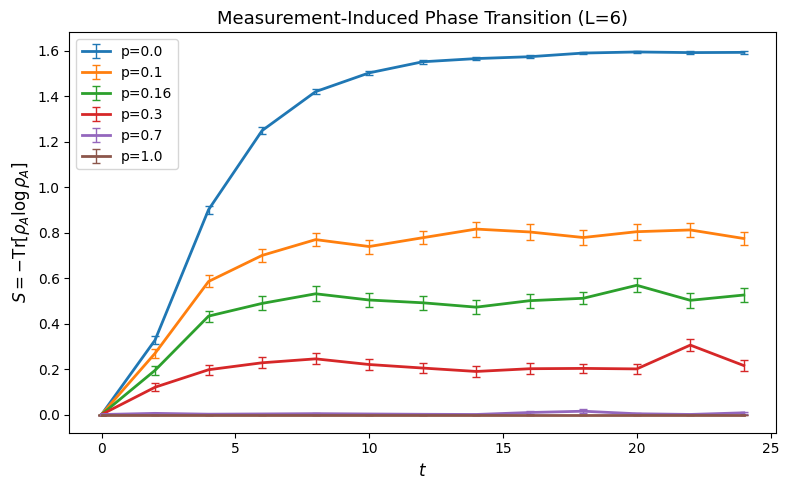


Plotting results for L = 7


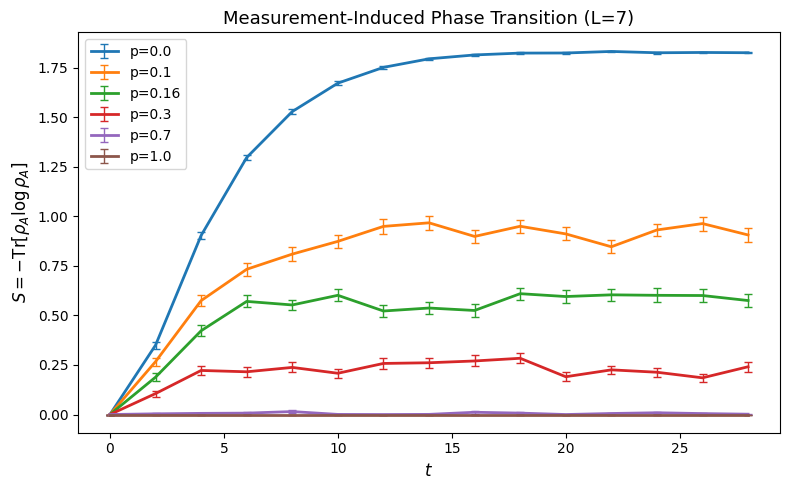


Plotting results for L = 8


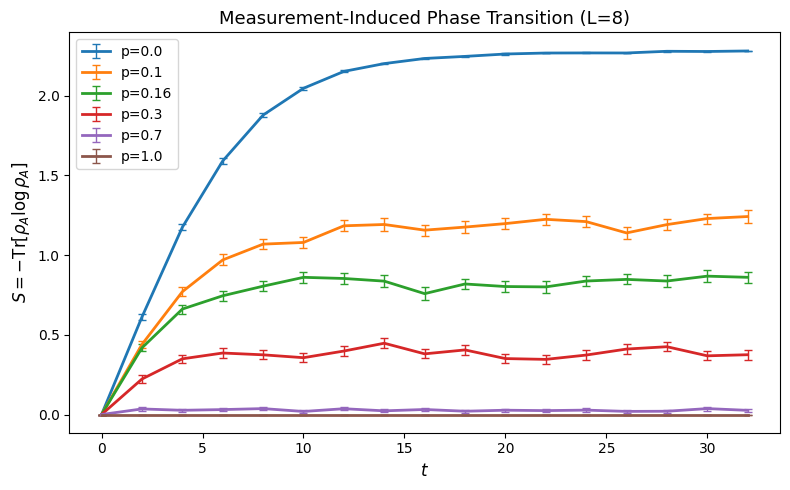


Plotting results for L = 9


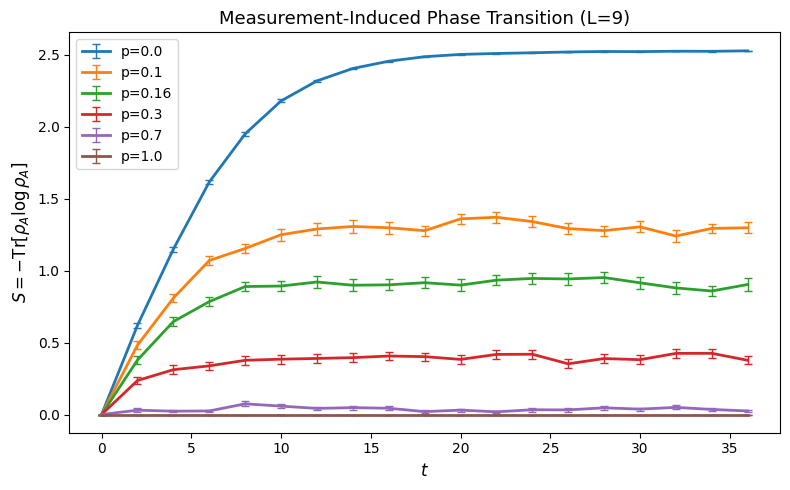


Plotting results for L = 10


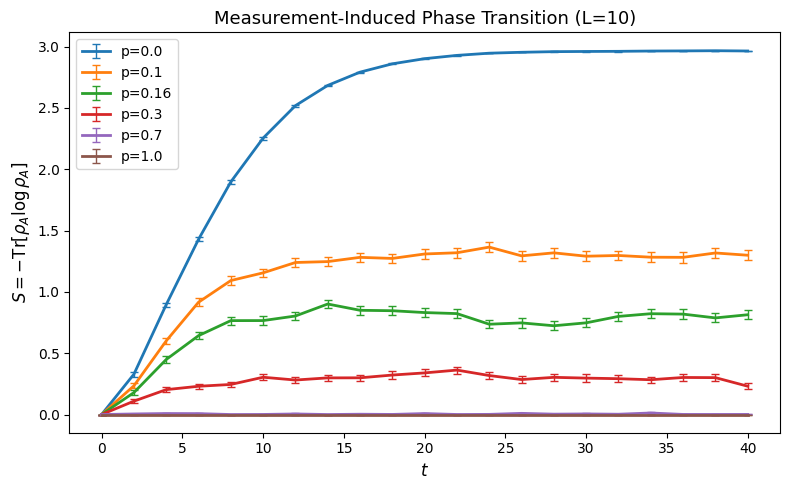

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# --- Parameters ---
data_dir = r"D:\Research\Jed\entanglement-dynamics\data_hc_haarl"
L_list = [6, 7, 8, 9, 10]
p_values = [0. , 0.1, 0.16, 0.3, 0.7, 1. ]
Nshots = 200  # number of realizations used per (L, p)

# --- Plot for each system size separately ---
for L in L_list:
    plt.figure(figsize=(8, 5))
    print(f"\nPlotting results for L = {L}")

    for p in p_values:
        # Find all files for this L and p
        pattern = os.path.join(data_dir, f"L{L},T*,dt*,p{p},dirZ,s*.npy")
        files = sorted(glob.glob(pattern))

        if len(files) == 0:
            print(f"⚠️ No data found for L={L}, p={p}")
            continue

        # Load all shots
        shots = [np.load(f) for f in files]
        shots = np.array(shots)

        # Compute mean and standard error
        mean_S = np.mean(shots, axis=0)
        std_S = np.std(shots, axis=0, ddof=1)  # unbiased std
        sem_S = std_S / np.sqrt(len(shots))    # standard error

        # Time axis from data length
        tmax = len(mean_S) - 1
        trange = np.arange(tmax + 1)

        # Plot mean with error bars
        plt.errorbar(trange[::2], mean_S[::2], yerr=sem_S[::2],
                     lw=2, elinewidth=1, capsize=3, label=f"p={p}")

    plt.xlabel(r'$t$', fontsize=12)
    plt.ylabel(r'$S = -\mathrm{Tr}[\rho_A \log \rho_A]$', fontsize=12)
    plt.title(f'Measurement-Induced Phase Transition (L={L})', fontsize=13)
    plt.legend()
    plt.tight_layout()
    plt.show()